In [131]:
from datetime import datetime

import sns as sns
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn import preprocessing
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn import metrics

import pandas as pd

In [139]:
# finestra di selezione e apertura del dataset
Tk().withdraw()
filename = askopenfilename()
if "rover_a" in filename or "rover_b" in filename:
    DATASET = "ROVER"
else:
    DATASET = "AKRON"

In [140]:
WITH_TIME = False

dataset = pd.read_csv(filename, header=0)
# trasformo il tempo da datetime a time-stamp, ovvero in secondi
dataset["TIME_STAMP"] = dataset["TIME_STAMP"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f").timestamp())
# dare in pasto il tempo oppure no alla rete
if not WITH_TIME:
    dataset.set_index("TIME_STAMP", inplace=True)
if DATASET == "AKRON":
    # dare in pasto alla rete l'emergenza dispositivo inserito oppure no
    WITH_BAD_EMERG = False
    if not WITH_BAD_EMERG:
        for index, row in dataset.iterrows():
            if "Dispositivo di emergenza inserito (GE0E16)" in row[4]:
                dataset.drop(index, axis=0, inplace=True)
    # trasformo i valori categorici (classi delle emergenze) in valori numerici (5 classi -> valori [0,1,2,3,4])
    dataset["ST_MACH_EMERG_DESC"] = preprocessing.LabelEncoder().fit_transform(dataset["ST_MACH_EMERG_DESC"])
    #sposto la colonna delle classi al fondo
    dataset = dataset[[c for c in dataset if c not in ["ST_MACH_EMERG_DESC"]] + ["ST_MACH_EMERG_DESC"]]
else:
    # trasformo i valori categorici in valori numerici (5 classi -> valori [0,1,2,3,4])
    for col in dataset.columns:
        if dataset[col].dtype == "object":
            dataset[col] = preprocessing.LabelEncoder().fit_transform(dataset[col])
    #sposto la colonna delle classi al fondo
    dataset = dataset[[c for c in dataset if c not in ["MACC_EME"]] + ["MACC_EME"]]
dataset

,BEARING_TEMP,BEARING_TEMP1,BEARING_TEMP2,BEARING_TEMP3,COOLER_STATUS,CURRENT,DEFL_PRESENT,FAN_ROTATION,LOCKED_TOOL,NAME,...,ESEC_PGM,HOMING,HOMING_DONE,MACC_ON,POWERED,SETUP,TOOL_CHANGE,WAIT_AC,WAIT_MC,MACC_EME
TIME_STAMP,,,,,,,,,,,,,,,,,,,,,
1.657873e+09,25.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1.657873e+09,24.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1.657873e+09,25.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1.657873e+09,25.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1.657874e+09,25.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.658158e+09,35.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1.658158e+09,35.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1.658158e+09,35.0,15.0,60.0,65.0,1,0.0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


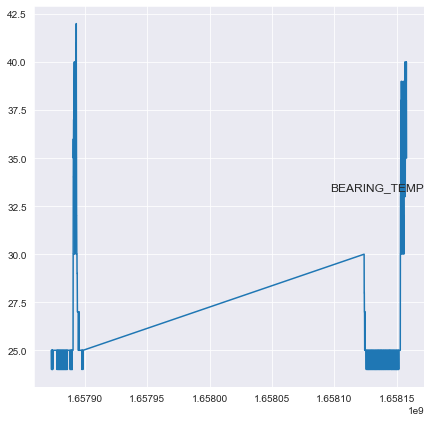

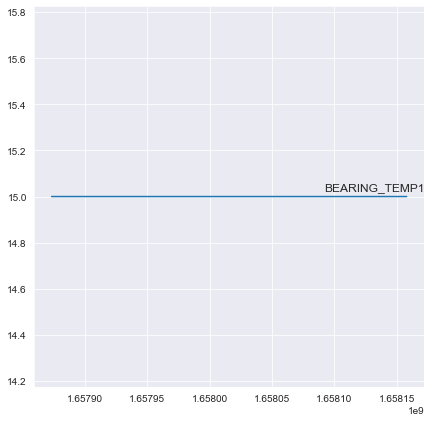

BEARING_TEMP1
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


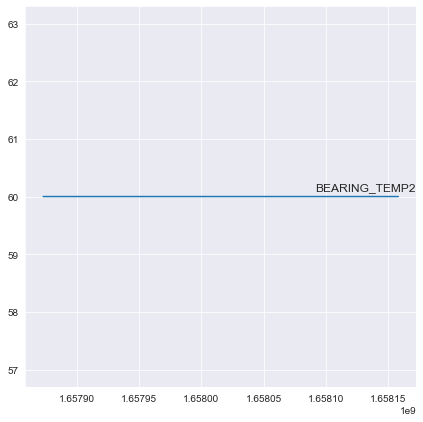

BEARING_TEMP2
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


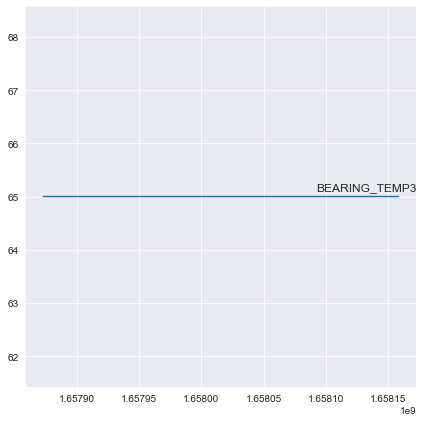

BEARING_TEMP3
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


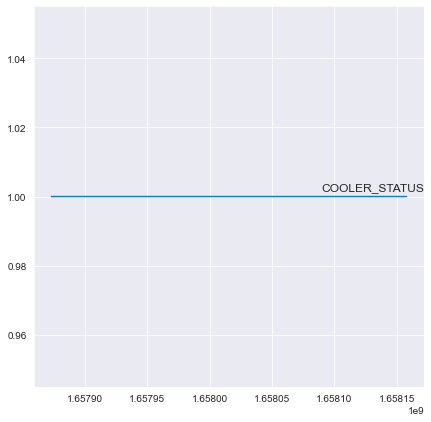

COOLER_STATUS
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


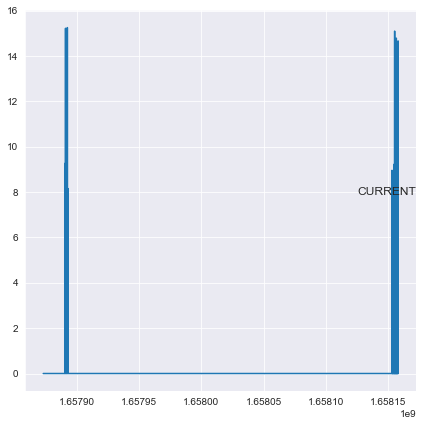

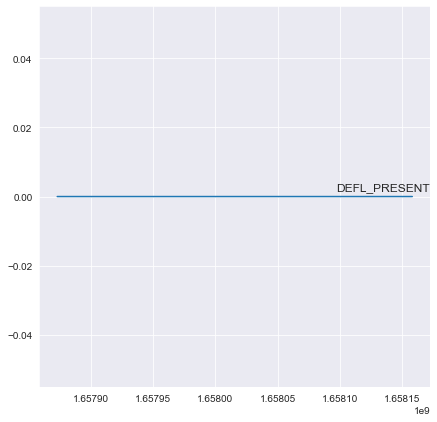

DEFL_PRESENT
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


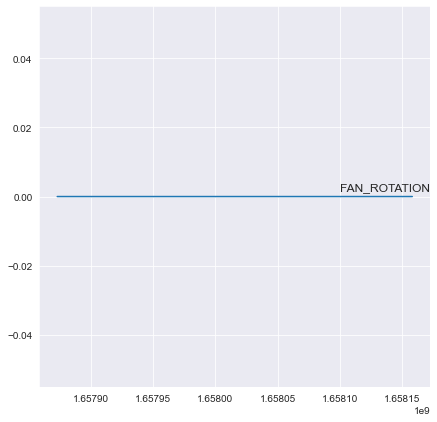

FAN_ROTATION
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


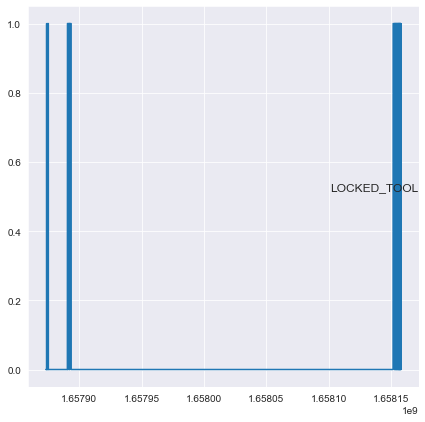

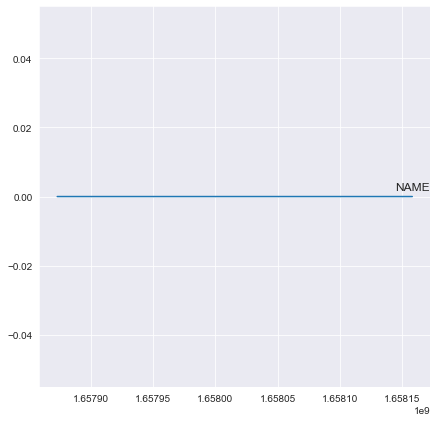

NAME
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


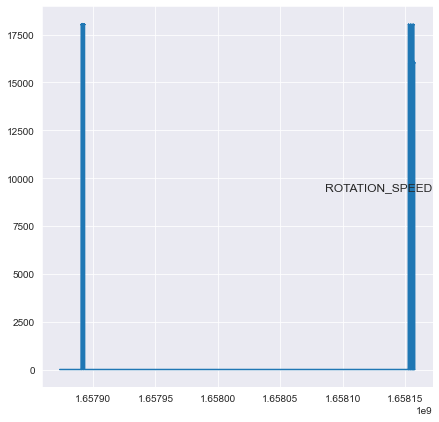

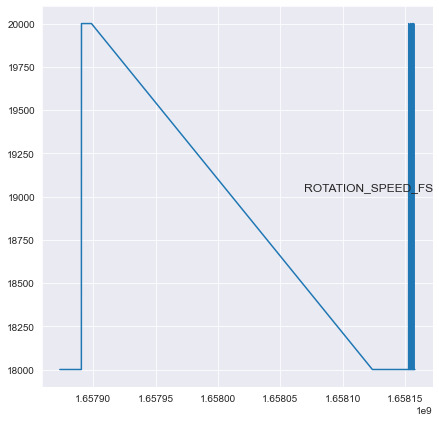

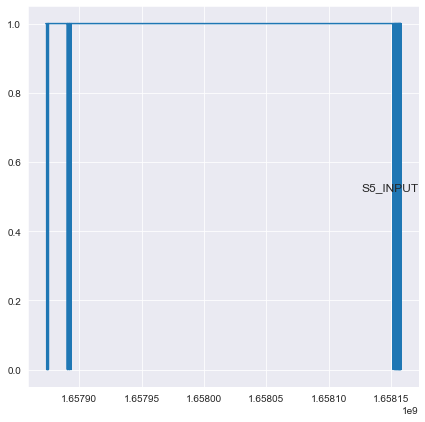

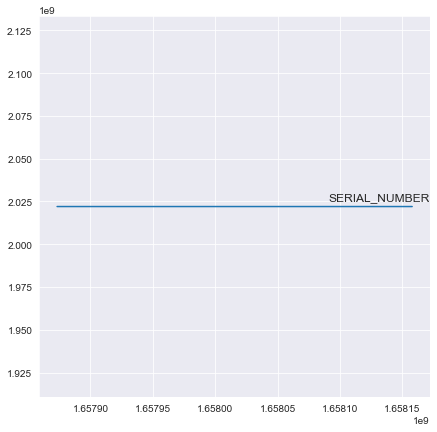

SERIAL_NUMBER
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


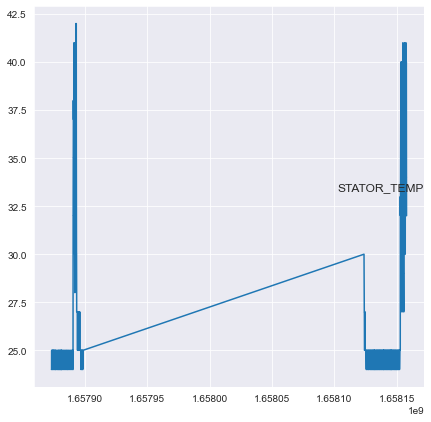

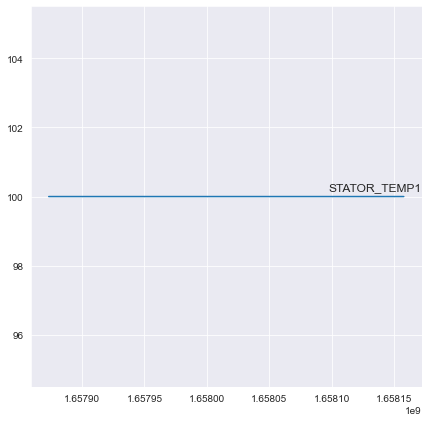

STATOR_TEMP1
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


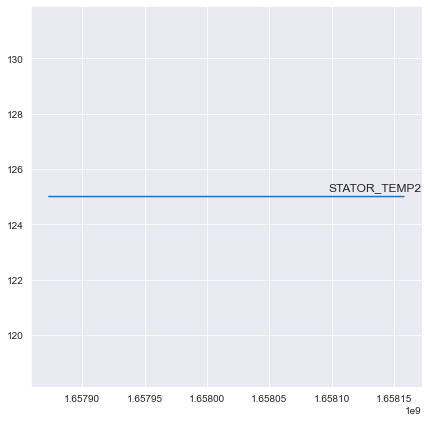

STATOR_TEMP2
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


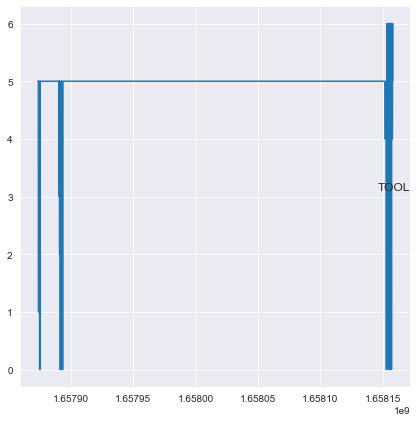

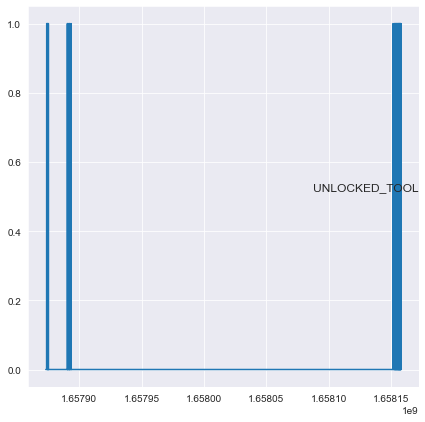

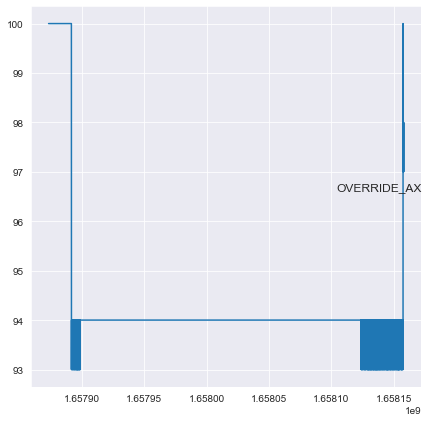

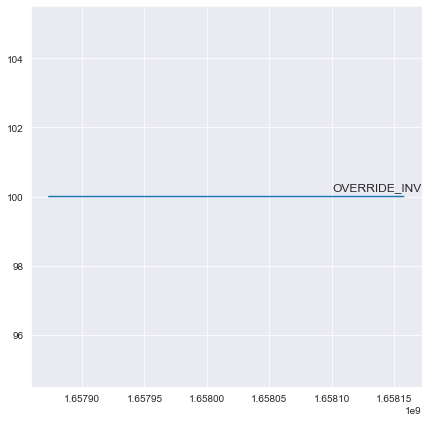

OVERRIDE_INV
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


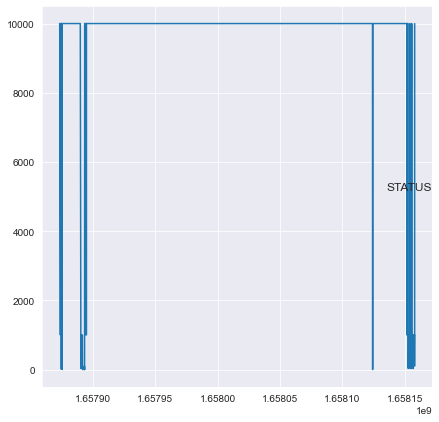

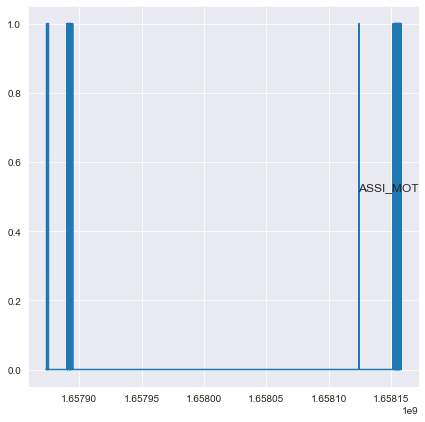

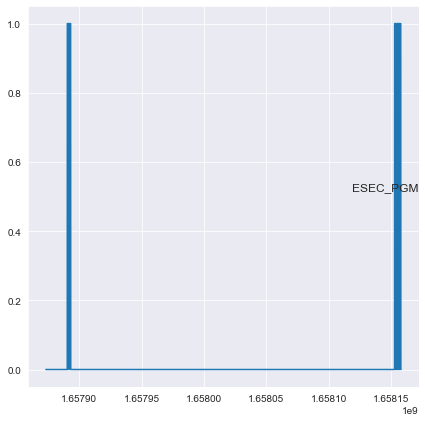

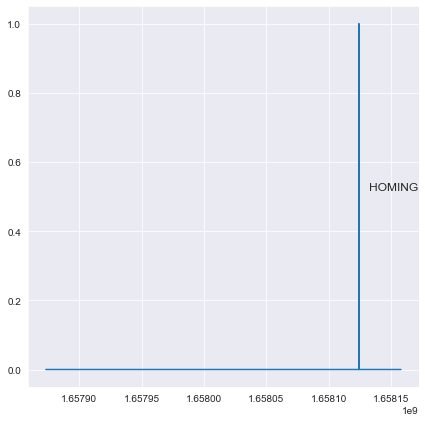

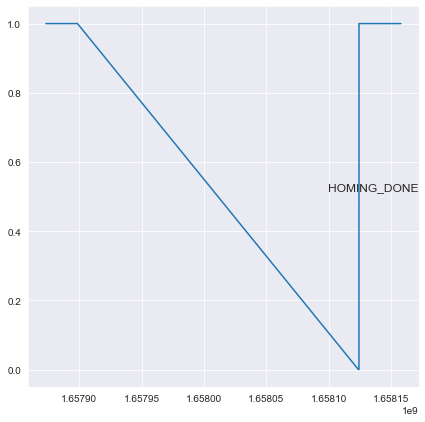

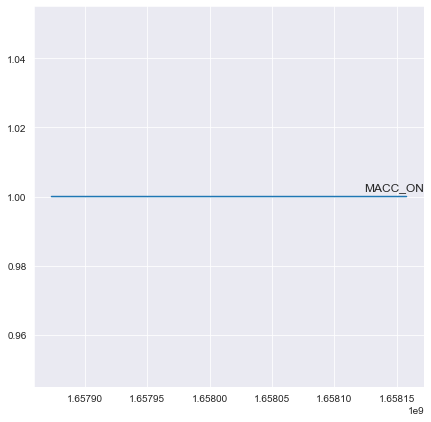

MACC_ON
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


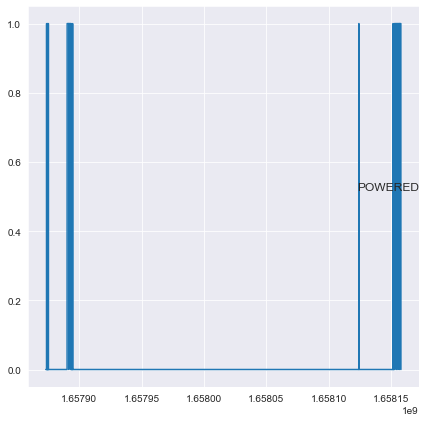

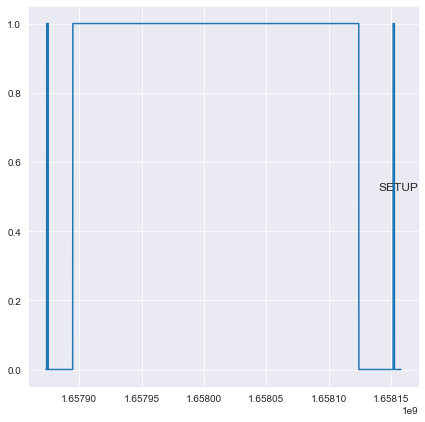

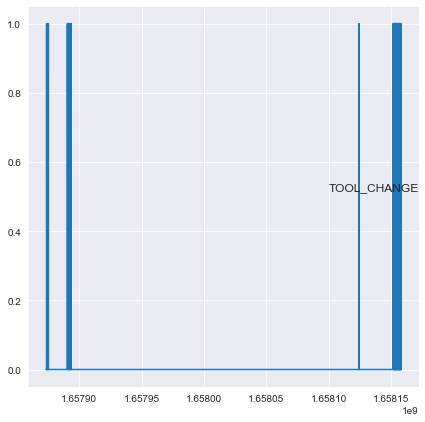

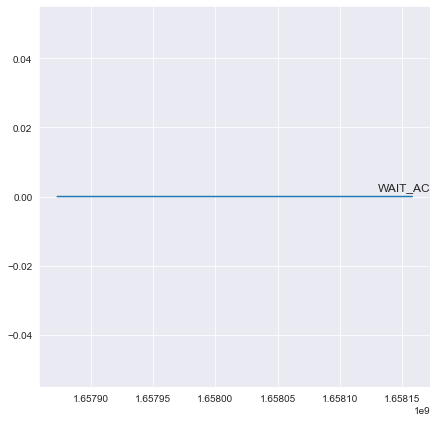

WAIT_AC
La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.


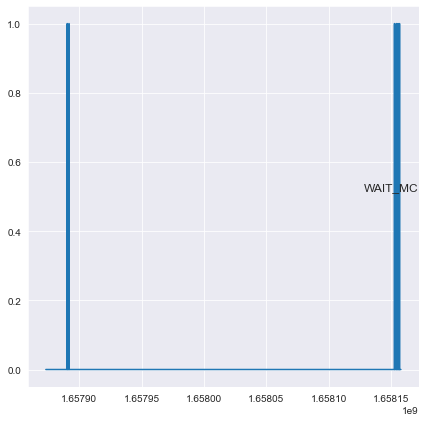

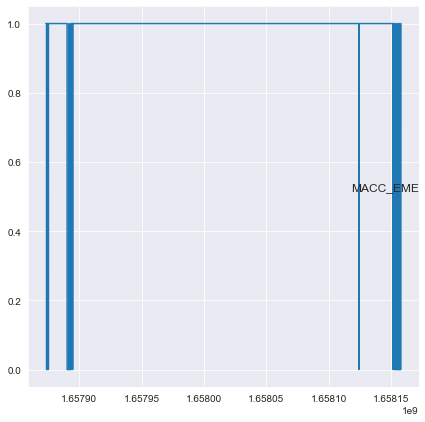

In [141]:
values = dataset.values
# plotto l'andamento nel tempo di ogni feature del dataset
columns = range(len(dataset.columns))
to_drop = list()
for col in columns:
    pyplot.figure(figsize=(7, 7))
    pyplot.plot(dataset.index.values, values[:, col])
    pyplot.title(dataset.columns[col], y=0.5, loc='right')
    pyplot.show()
    if values[:, col].std() == 0.0:
        print(dataset.columns[col])
        print("La feature non da alcuna informazione aggiuntiva, è sempre costante; si può togliere.")
        to_drop.append(col)
dataset.drop(dataset.columns[to_drop], axis=1, inplace=True)
values = dataset.values

In [149]:
values[:, -1] = values[:, -1].astype('int64')
values

array([1., 1., 1., ..., 0., 1., 1.])

In [143]:
# normalizzo tutti i dati in modo che siano tutti sullo stesso range
# x = (x - x_min)/(x_max-x_min)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = values
scaled[:, :-1] = scaler.fit_transform(values[:, :-1])
scaled

array([[0.05555556, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05555556, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61111111, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.61111111, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [114]:
n_train_hours = len(scaled) - int(len(scaled) * 0.05)
train = scaled[:n_train_hours, :]
test = scaled[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2349, 24) (2349,) (123, 24) (123,)


In [115]:
model = SVC()
model.fit(train_X, train_y)

SVC()

In [116]:
predicted_y = model.predict(test_X)

In [117]:
print(metrics.classification_report(test_y, predicted_y))
print(metrics.confusion_matrix(test_y, predicted_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00        81

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

[[42  0]
 [ 0 81]]


In [118]:
print(metrics.r2_score(test_y, predicted_y))
print(metrics.mean_squared_log_error(test_y, predicted_y))

1.0
0.0


C:\Users\Orch13\Desktop\Stage & Tesi\Codes\scriptStage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

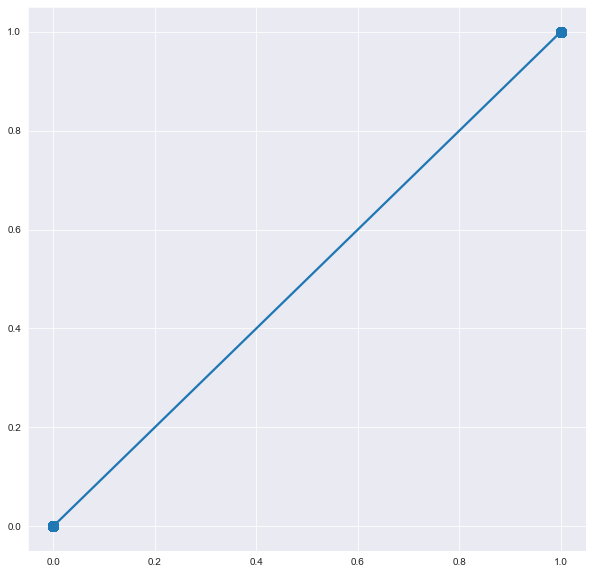

In [119]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.regplot(test_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})